In [18]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("E:\Epsilon_ai\Final_Project\_Cleaned_Taxi_Datset.csv")

In [4]:
df.shape

(6242246, 22)

In [5]:
df.head(1)

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time,duration_of_the_trip,drop_of_location,pick_up_location
0,1,1.0,1.2,1.0,238.0,239.0,cash,6.0,3.0,0.5,...,0.3,11.27,2.5,2020-01-01,0 days 00:28:15,2020-01-01,0 days 00:33:03,4.8,East Chelsea,Astoria


In [7]:
df2 = df.sample(frac=0.1, random_state=42)  # Sampling 10% of the data

In [8]:
df.to_csv("Data_readyy_to_streamlit_downsampled" , index =False)

In [3]:
df3 = pd.read_csv("E:\Epsilon_ai\Final_Project\Data_readyy_to_streamlit_downsampled")

In [7]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['pickup_time'] = pd.to_timedelta(df['pickup_time'])

df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['dropoff_time'] = pd.to_timedelta(df['dropoff_time'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6242246 entries, 0 to 6242245
Data columns (total 22 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   vendorid               int64          
 1   passenger_count        float64        
 2   trip_distance          float64        
 3   ratecodeid             float64        
 4   pulocationid           float64        
 5   dolocationid           float64        
 6   payment_type           object         
 7   fare_amount            float64        
 8   extra                  float64        
 9   mta_tax                float64        
 10  tip_amount             float64        
 11  tolls_amount           float64        
 12  improvement_surcharge  float64        
 13  total_amount           float64        
 14  congestion_surcharge   float64        
 15  pickup_date            datetime64[ns] 
 16  pickup_time            timedelta64[ns]
 17  dropoff_date           datetime64[ns] 
 18  dr

In [9]:
df.shape

(6242246, 22)

In [10]:
df.to_csv("Dataforstreamlit.csv",index =False)

# Univarient analysis

### Payment type

In [22]:
df['payment_type'].value_counts(normalize = True)

,proportion
payment_type,
cash,0.762427
mobile,0.231590
credit card,0.004365
prcard,0.001618


In [23]:
df['tip_amount'].value_counts(normalize = True).round(3)

,proportion
tip_amount,
0.00,0.255
1.00,0.067
2.00,0.044
1.50,0.017
2.06,0.014
...,...
10.65,0.000
22.08,0.000
29.01,0.000


In [ ]:
fig = px.histogram(df, x='tip_amount',color='payment_type',nbins = 15)

fig.show()

In [ ]:
plt.figure(figsize=(10, 6))
px.histogram(df['payment_type'])

### Trip Distance

In [ ]:
df.trip_distance.describe()

count    624864.000000
mean          1.755921
std           1.101822
min           0.010000
25%           0.900000
50%           1.480000
75%           2.300000
max           5.290000
Name: trip_distance, dtype: float64

Done

## Trip _distance

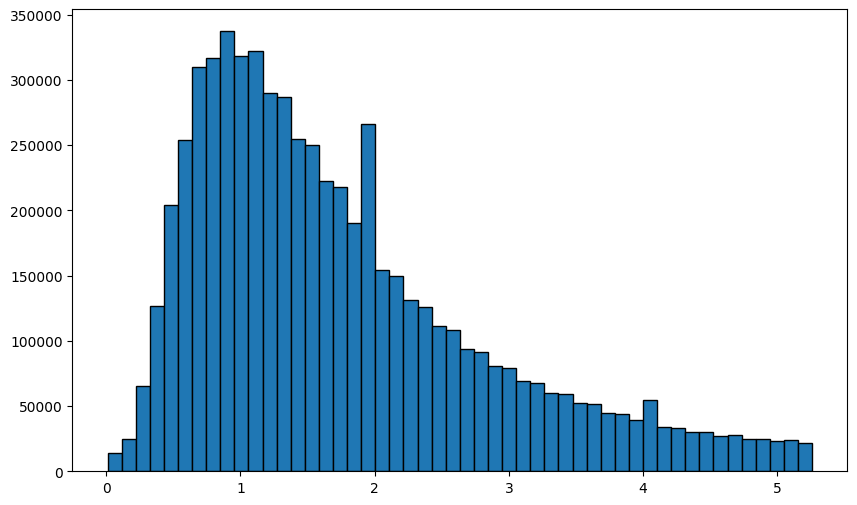

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df.trip_distance, bins=50, edgecolor='black')
plt.show()

## Passenger_count

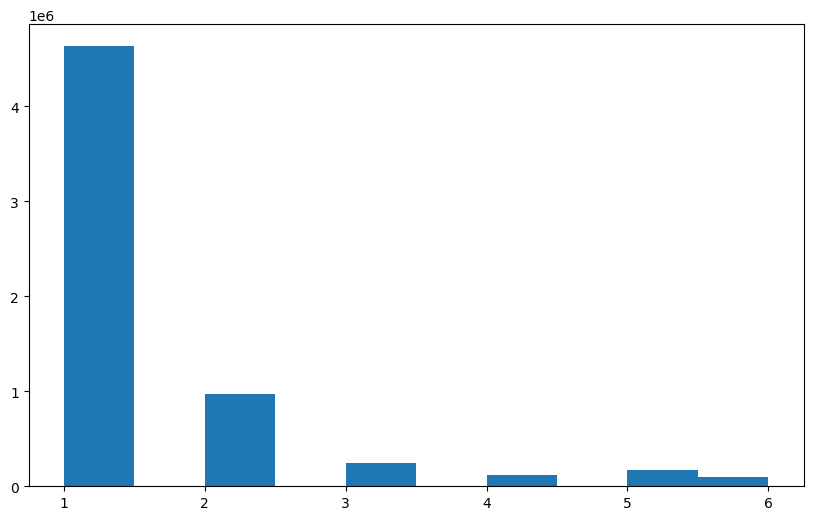

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['passenger_count'])
plt.show()

it is clearly that 1-seat travel is the most ordered

## pickup_date && drop_date

In [ ]:
## DEmand along the week

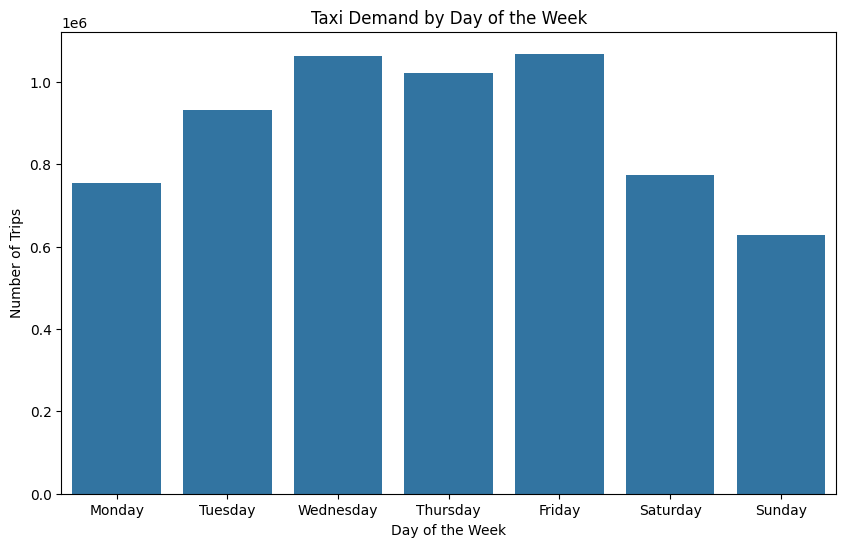

In [28]:
# Extracting day of the week from pickup datetime
df['day_of_week'] = df['pickup_date'].dt.day_name()

# Plotting taxi demand by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Taxi Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()


In [ ]:
## Demand according to the hour

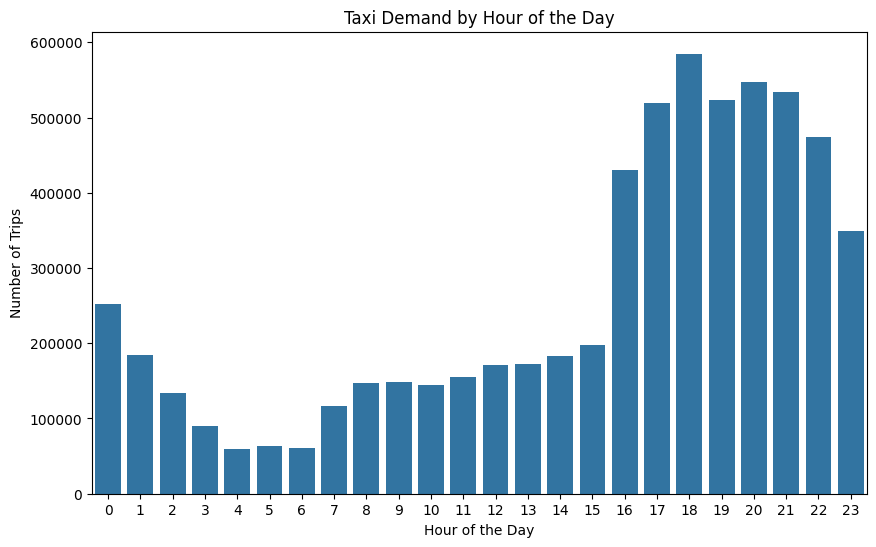

In [29]:
# Plotting taxi demand by hour of the day
df['hour_of_day'] = df['pickup_time'].dt.components.hours
plt.figure(figsize=(10, 6))
sns.countplot(x='hour_of_day', data=df)
plt.title('Taxi Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

In [30]:
# Pie Chart
plt.figure(figsize=(8, 6))
px.pie( values = df.day_of_week.value_counts(normalize = True) *100,names =df.day_of_week.unique() , hole = 0.3,
       color_discrete_sequence=px.colors.sequential.RdBu)


<Figure size 800x600 with 0 Axes>

In [ ]:
df['pick_up_hours'] = df['pickup_time'].dt.components.hours

In [ ]:
df['drop_off_hours'] = df['dropoff_time'].dt.components.hours

In [ ]:
time = ["pickup_time","dropoff_time", "duration_of_the_trip","pick_up_hours", "drop_off_hours"]

In [ ]:
for i in time :
    data_group = df.groupby(i)["fare_amount"].mean()
    fig = px.line (data_group , x = data_group.index , y = "fare_amount" , title = f"Average Fare Amount {i}"
                 ,color_discrete_sequence=px.colors.sequential.RdBu , labels = {i : i,"fare_amount" : "Average Fare Amount"} )
    fig.update_xaxes(title = i)
    fig.update_yaxes(title = "Average Fare Amount")
    fig.show()


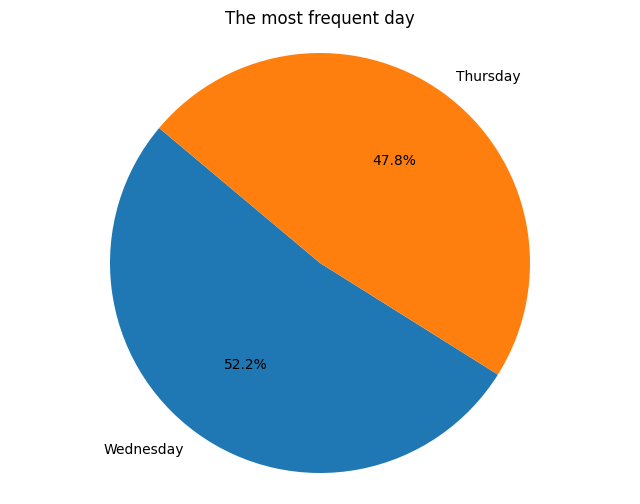

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie( df.day_of_week.value_counts(normalize = True) *100,labels =df.day_of_week.unique() , autopct='%1.1f%%', startangle=140)
plt.title('The most frequent day')
plt.axis('equal')
plt.show()

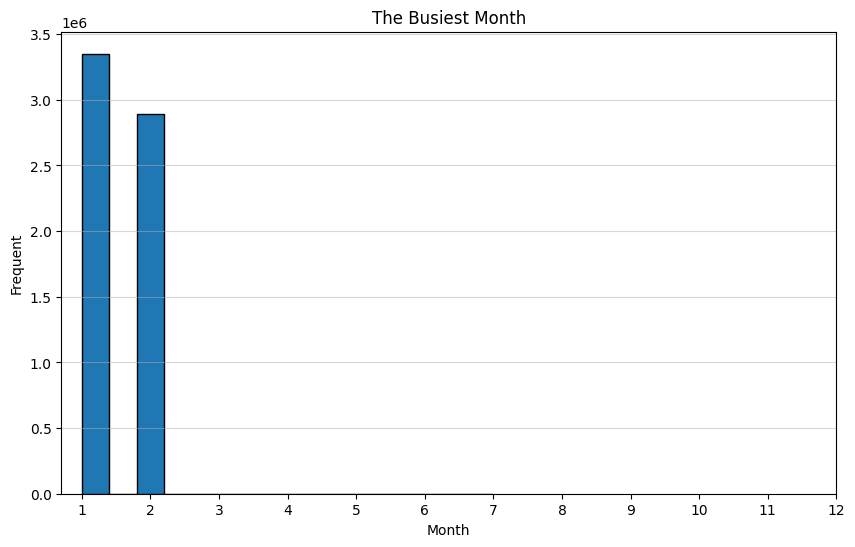

In [31]:
# Create histogram of month
plt.figure(figsize=(10, 6))
plt.hist(df.pickup_date.dt.month, bins=15, edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Frequent')
plt.title('The Busiest Month')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.5)
plt.show()

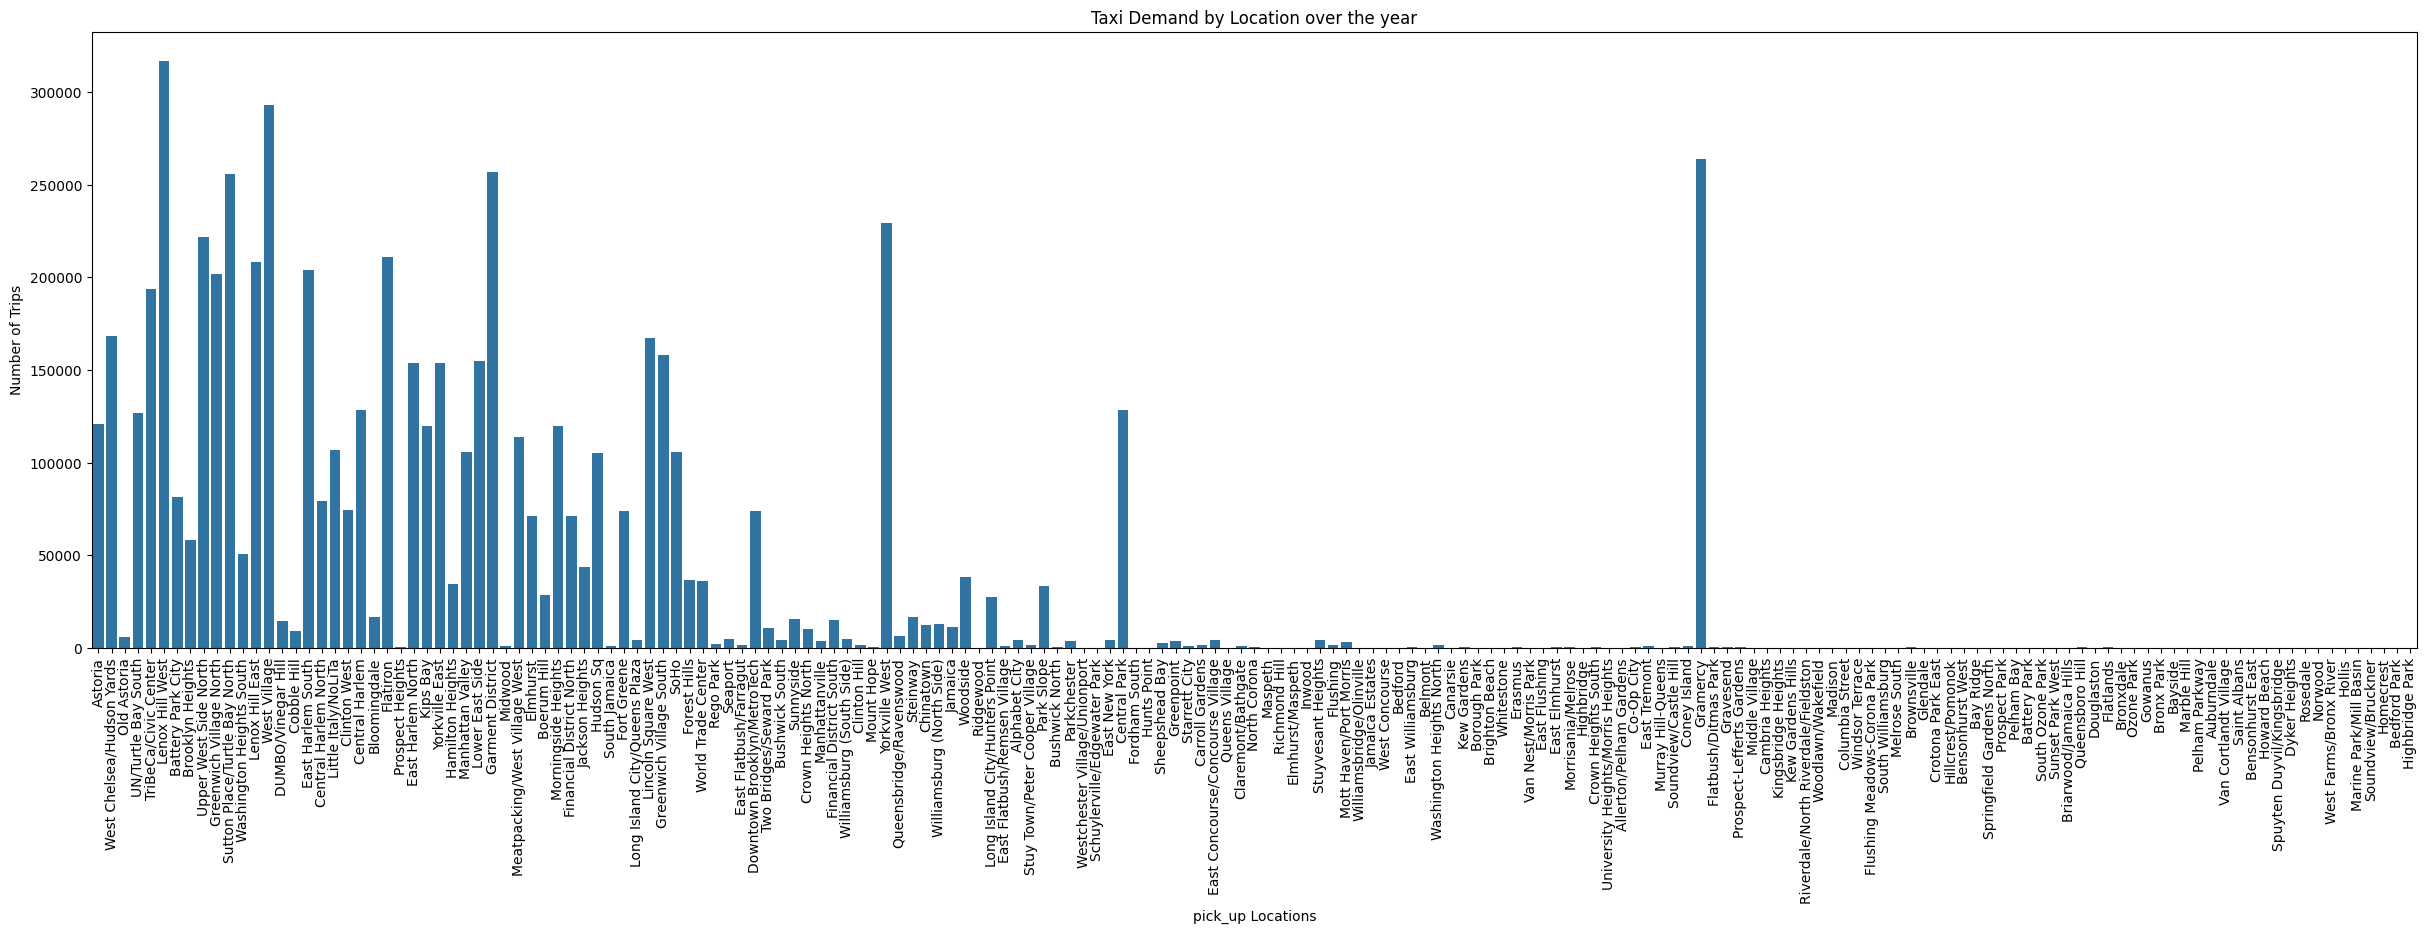

In [32]:

plt.figure(figsize=(30, 8))
sns.countplot(x='pick_up_location', data=df)
plt.title('Taxi Demand by Location over the year')
plt.xlabel('pick_up Locations')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.show()

In [33]:
Top_pick_up = df.pick_up_location.value_counts(normalize = True ,ascending = False ).head(10).keys()

In [34]:
Top_pick_up

Index(['Lenox Hill West', 'West Village', 'Gramercy', 'Garment District',
       'Sutton Place/Turtle Bay North', 'Yorkville West',
       'Upper West Side North', 'Flatiron', 'Lenox Hill East',
       'East Harlem South'],
      dtype='object', name='pick_up_location')

In [1]:
Percentage = df.pick_up_location.value_counts(normalize = True ,ascending = False ).head(10).tolist()

NameError: name 'df' is not defined

In [36]:
Percentage

[0.050741031353137955,
 0.04691836880507433,
 0.04227981402847629,
 0.04119799187664184,
 0.04102129265652139,
 0.03676449149873299,
 0.03551045569174941,
 0.03379696987270287,
 0.0333408840343684,
 0.03268118558608552]

In [37]:
mapping = dict(zip(Percentage, Top_pick_up))

NameError: name 'lanells' is not defined

In [38]:
dfx = pd.DataFrame()
dfx["X"] = Top_pick_up
dfx["Y"] = Percentage

In [41]:
fig = px.bar(dfx, x = Percentage , y=Top_pick_up, title="The Most Frequent pick_up_locations")


fig.update_xaxes(title_text="Areas", tickangle=90)
fig.update_yaxes(title_text="Percentage")
fig.update_layout(
    title=dict(
        text="The Top 10 Frequent pick_up_locations",
        font=dict(size=24)
    ),
    xaxis_title=dict(
        text="Percentage of the Trips",
        font=dict(size=18)
    ),
    yaxis_title=dict(
        text="Areas",
        font=dict(size=18) ))

fig.show()

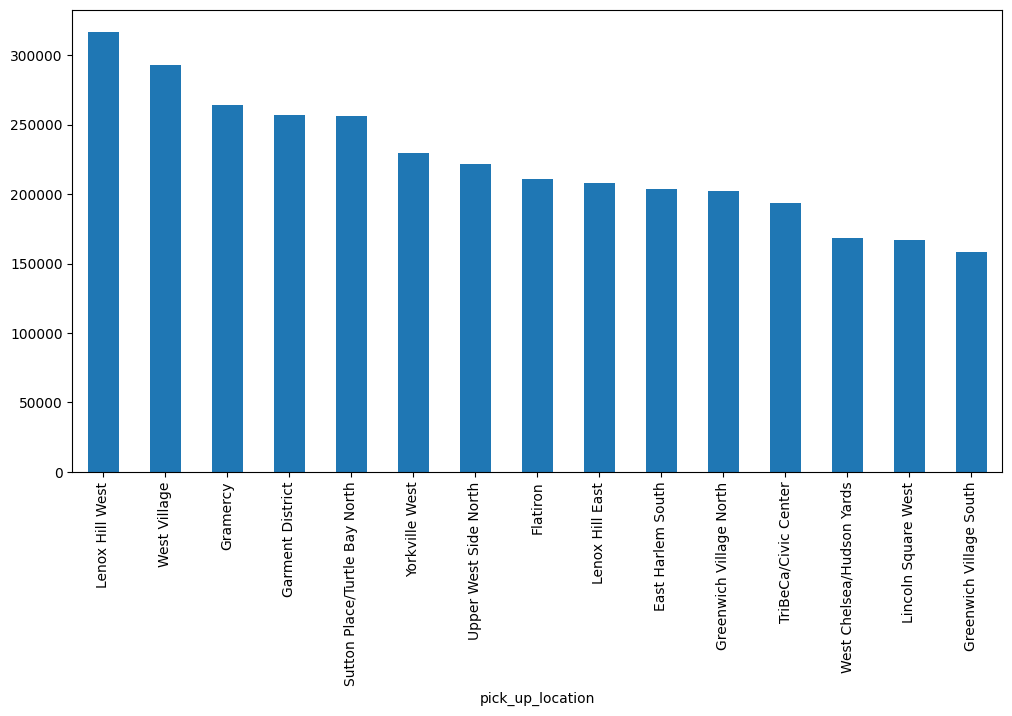

In [57]:
# top 15 most famous pickup locations
plt.figure(figsize=(12,6))
df['pick_up_location'].value_counts().sort_values(ascending= False).head(15).plot(kind = 'bar')
plt.show()

In [72]:
px.pie( values = df.day_of_week.value_counts(normalize = True) *100,names =df.day_of_week.unique() , hole = 0.3,
       color_discrete_sequence=px.colors.sequential.RdBu)

Index(['Dyker Heights', 'Bronxdale', 'Inwood', 'Highbridge Park', 'Flatlands',
       'Homecrest', 'Morningside Heights', 'Queens Village', 'Fordham South',
       'Rego Park', 'East Harlem North', 'West Village',
       'Queensbridge/Ravenswood', 'Sutton Place/Turtle Bay North',
       'Crotona Park East'],
      dtype='object', name='pick_up_location')

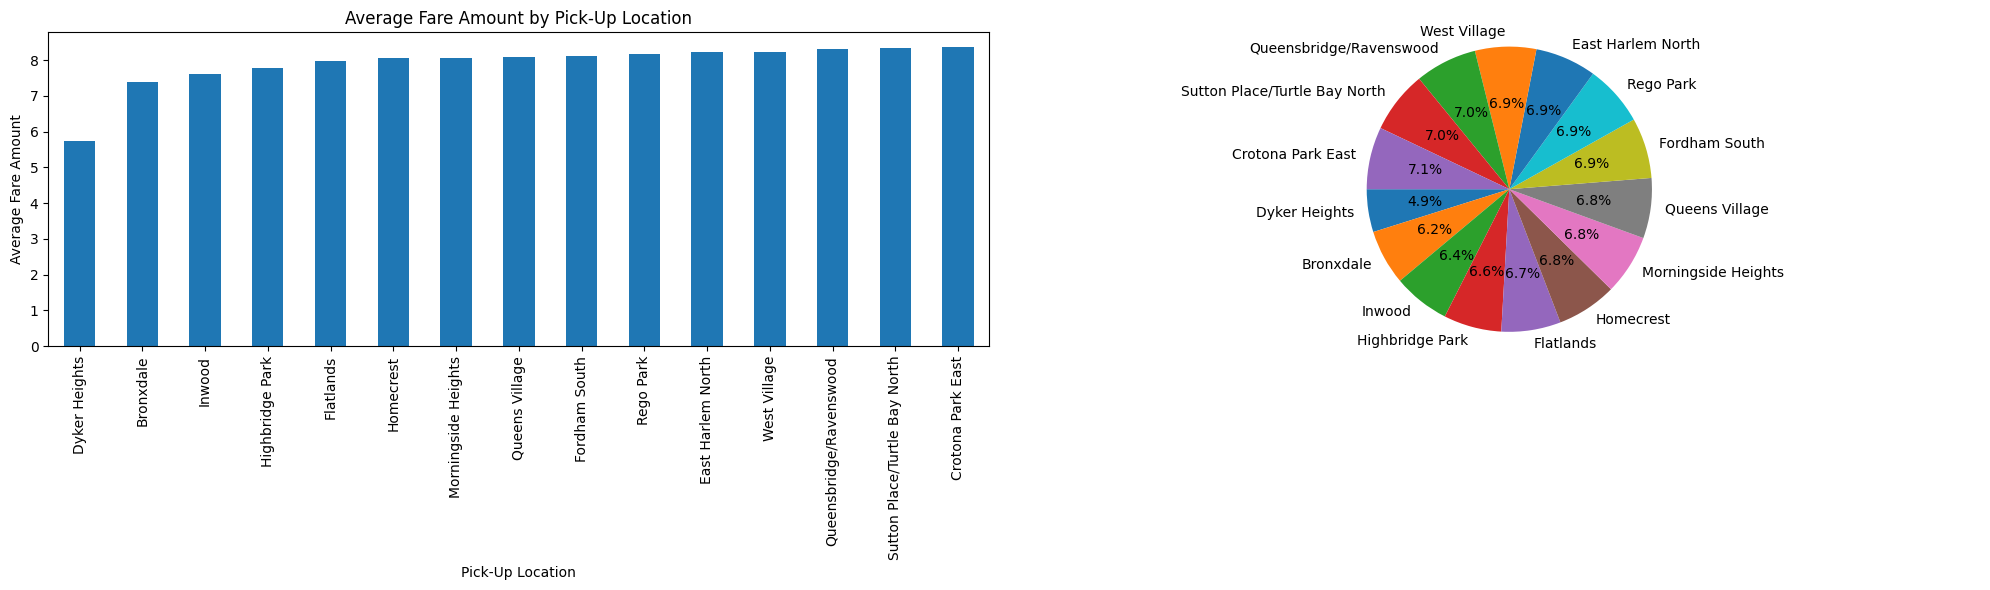

In [79]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: Bar plot
df.groupby('pick_up_location').fare_amount.mean().sort_values().head(15).plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Pick-Up Location')
axs[0].set_ylabel('Average Fare Amount')
axs[0].set_title('Average Fare Amount by Pick-Up Location')

# Second subplot: Pie chart
axs[1].pie(df.groupby('pick_up_location').fare_amount.mean().sort_values().head(15),
           labels=df.groupby('pick_up_location').fare_amount.mean().sort_values().head(15).keys(),
           autopct='%1.1f%%',
           startangle=180)

axs[1].axis('equal')

plt.tight_layout()
plt.show()

<Axes: xlabel='pick_up_location'>

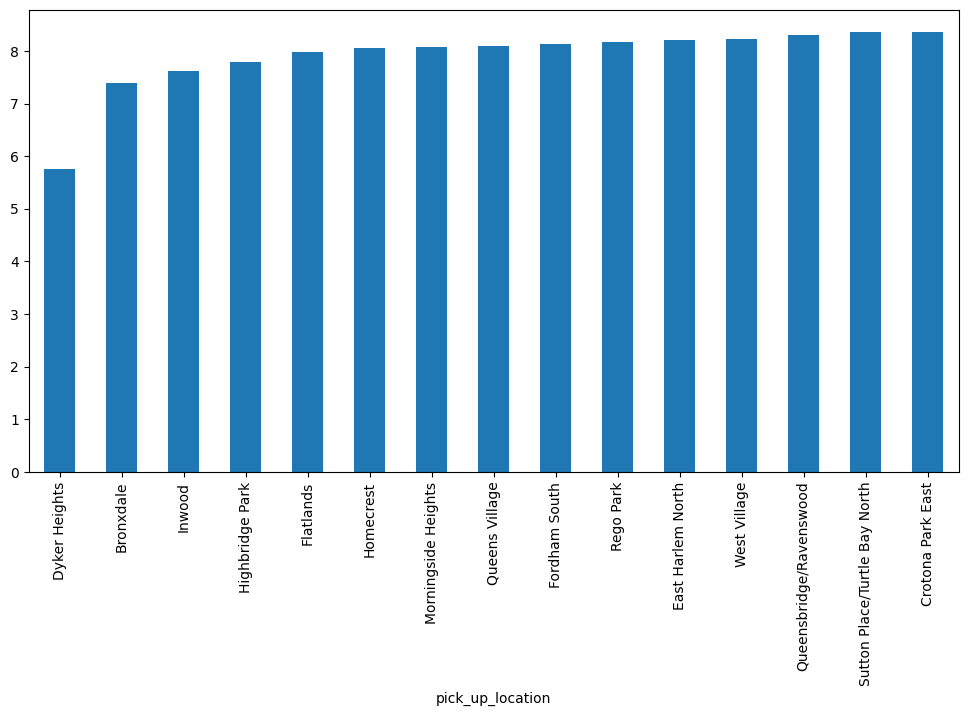

In [59]:
plt.figure(figsize=(12,6))
df.groupby('pick_up_location').fare_amount.mean().sort_values().head(15).plot(kind = 'bar')
fig.update_xaxes(title = i)
  fig.update_yaxes(title = "Average Fare Amount")
# LocationID 250.0 charges max fare

In [42]:
labels_drop_off = df.drop_of_location.value_counts(normalize = True ,ascending = False ).head(10).keys()

In [43]:
ValuesOfDropOff = df.drop_of_location.value_counts(normalize = True ,ascending = False ).head(10).tolist()

In [44]:
mapping = dict(zip(labels_drop_off, ValuesOfDropOff))

In [45]:
dfx_drop = pd.DataFrame()
dfx_drop["x"] = ValuesOfDropOff
dfx_drop["y"] = labels_drop_off

In [46]:

fig.update_xaxes(tickangle=90)
fig = px.bar(dfx, x = ValuesOfDropOff , y=labels_drop_off)


fig.update_xaxes(title_text="Areas", tickangle=90)
fig.update_yaxes(title_text="Percentage")
fig.update_layout(
    title=dict(
        text="The Top 10 Frequent Drop_Off_locations",
        font=dict(size=24)
    ),
    xaxis_title=dict(
        text="Percentage of the Trips",
        font=dict(size=18)
    ),
    yaxis_title=dict(
        text="Areas",
        font=dict(size=18) ))

fig.show()

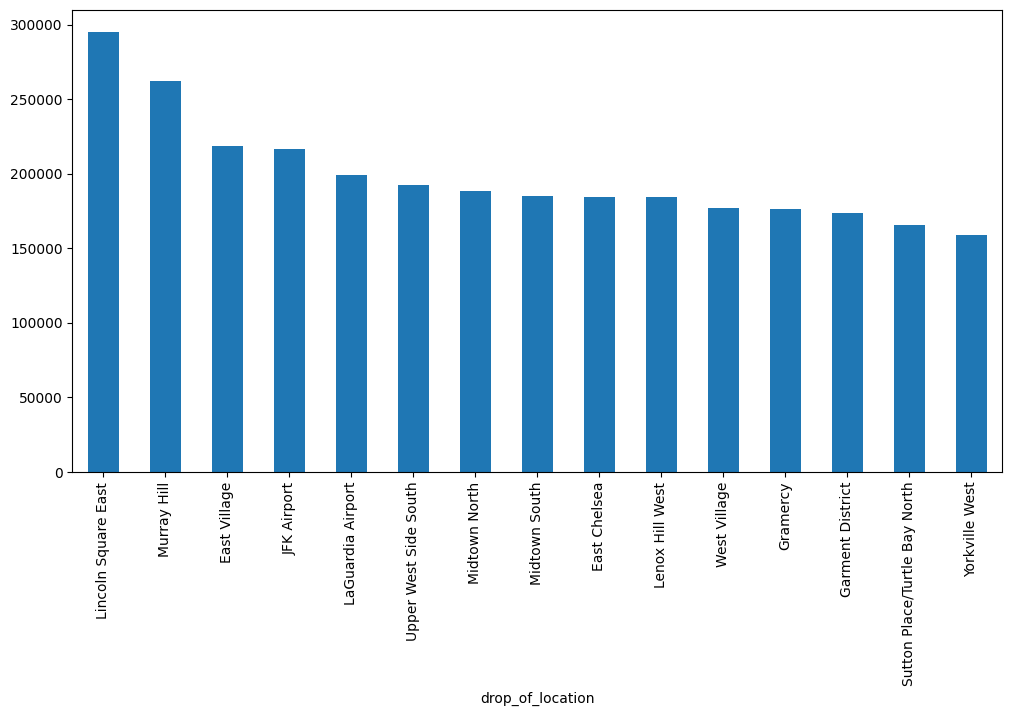

In [58]:
# top 15 most famous dropoff locations
plt.figure(figsize=(12,6))
df['drop_of_location'].value_counts().sort_values(ascending= False).head(15).plot(kind = 'bar')
plt.show()

# Bivarient analysis

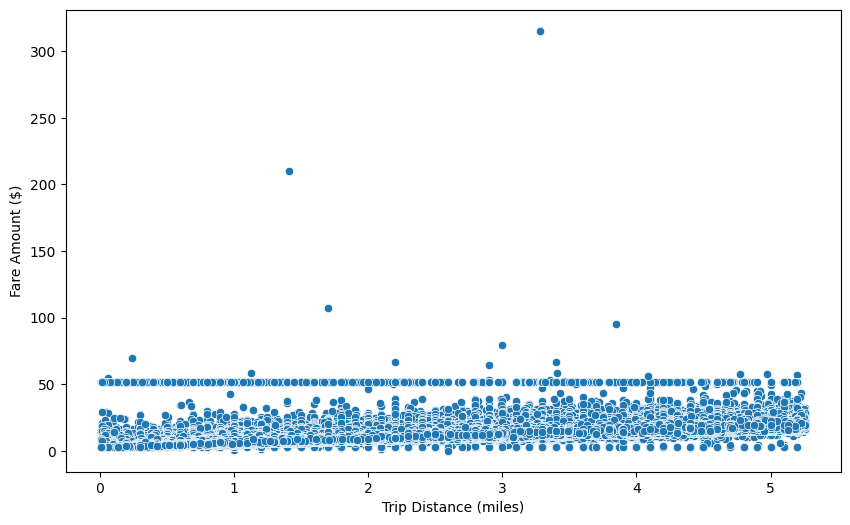

In [80]:
# Plotting correlation between trip distance and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [52]:
df3 = df.select_dtypes('float','int')

In [53]:
df3.drop(columns = ["mta_tax","tolls_amount"],axis =1, inplace = True)

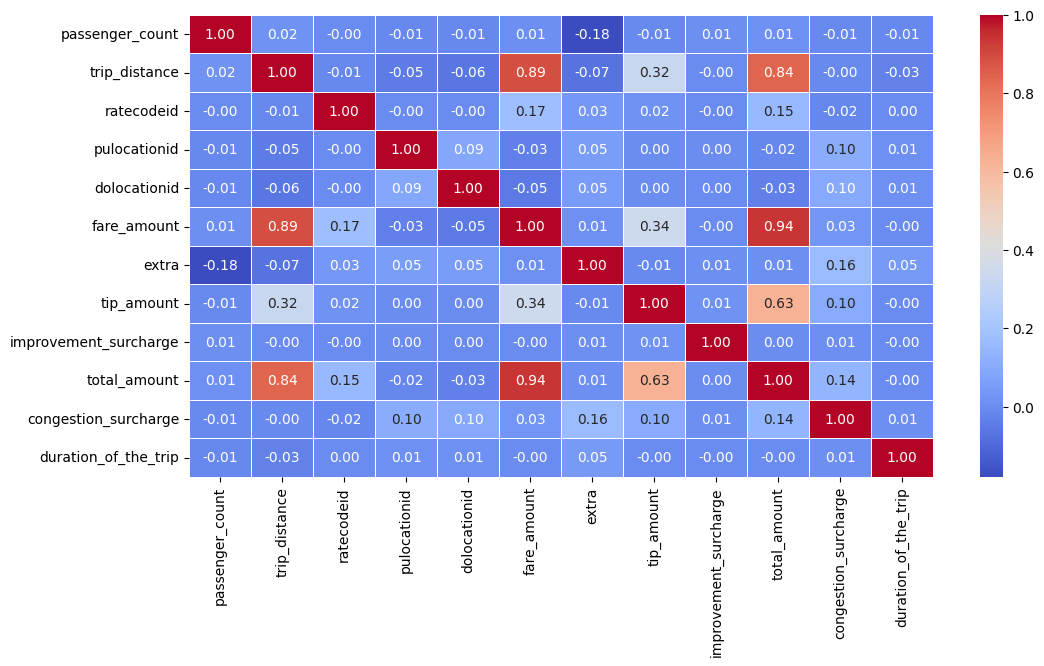

In [54]:
num_cols = df3.select_dtypes('float','int')
plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

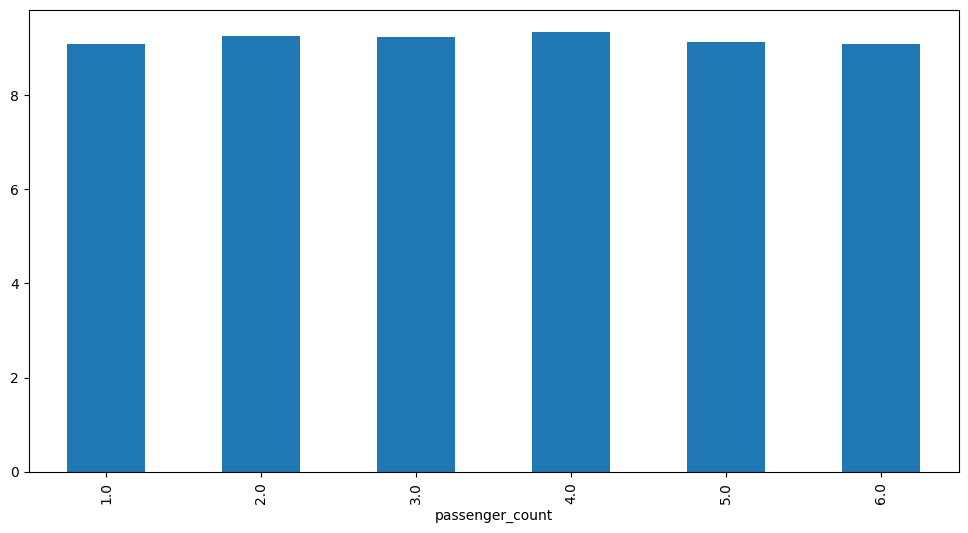

In [55]:
plt.figure(figsize=(12,6))
df.groupby('passenger_count').fare_amount.mean().plot(kind = 'bar')
plt.show()

In [83]:
df["month"] = df.pickup_date.dt.month

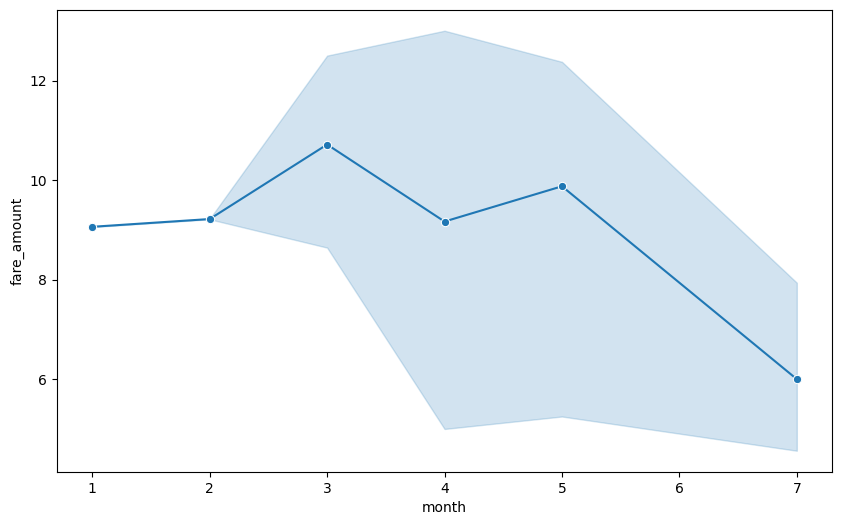

In [84]:
# fare amount over the years
# There are so too many records and it is time consuming to plot them that's why i have down sampled it
plt.figure(figsize=(10,6))
sns.lineplot(x = df['month'],y = df['fare_amount'], marker='o', linestyle='-')
plt.show()